<a href="https://colab.research.google.com/github/jacobarthurhoward/Twitter_Sentiment_Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import textblob

In [ ]:
consumer_key = 'brWkRkk57iWvMJ2RAplDaM77S'

In [ ]:
consumer_secret = 'AdglwfRKswKAlasEw3KMEaXKYPmfexxsrdU67GZnndB2v9Sfn5'

In [ ]:
access_token = '1162062731626680320-a1psusSYvjOejsBBtMdWTBxxuR0zmD'

In [ ]:
access_token_secret = 'O9R0Vm9BU9fLkQDRfeRkc3EvmBwXlFjOANJV7ySH40NjG'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [ ]:
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

# Authentication Complete

In [ ]:
public_tweets = api.search('Trump')

for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

RT @SimchaSaul: @aturtlenamedbo1 @PMbeers 9 days, vaccines moving out to the people, 46 executive orders reversing Trump’s corruption. http…
Sentiment(polarity=0.0, subjectivity=0.0)
@RWTrollPatrol @Jim_Jordan @SenTedCruz thinks he is the president in the movie #IndependenceDay. #LyinTed has hitch… https://t.co/uQ4QTqRdGr
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Acosta: Psaki at WH briefing: "This may be hard to believe. We don't spend a lot of time talking about or thinking about president Trum…
Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)
RT @tribelaw: Trump now says David Schoen and Bruce L. Castor, Jr., will lead his Senate defense. Schoen led the unsuccessful judicial chal…
Sentiment(polarity=0.0, subjectivity=0.0)
Em coletiva nesta segunda (1º), a secretária de imprensa da Casa Branca, Jen Psaki, foi questionada sobre a ausênci… https://t.co/Kd6PhflwF3
Sentiment(polarity=0.0, subjectivity=0.0)
‘Cowboys for Trump’ Leader Charged in Capitol Riots Me

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1


Show the 5 recent tweets: 

1) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon: https://t.co/clsscPwQUD https://t.co/sNl4kT9bE3

2) This has been a year unlike any other in our lifetimes. In our new Annual Letter, Melinda and I talk about how we can turn the hard-won lessons of the pandemic into a healthier, more equal future for all. https://t.co/Zt42aWl86x

3) RT @melindagates: I believe that women can be the architects of a better world. 

Their stories have instilled in me both a sense of urgenc…

4) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050: https://t.co/vxEjYjqAaD https://t.co/GkzumHP4wf

5) One of the benefits of being 65 is that I’m eligible for the COVID-19 vaccine. I got my first dose this week, and I feel great. Thank you to all of the scientists, trial participants, regulators, and frontli

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,"COVID-19 has cost lives, sickened millions, an..."
1,This has been a year unlike any other in our l...
2,RT @melindagates: I believe that women can be ...
3,Here are four other ways that America can adva...
4,One of the benefits of being 65 is that I’m el...


In [ ]:
# Clean Data

# Create a function
def clean(text):
    # Removal of certain words and symbols
    # Re.sub = substitute any pattern we find that we want removed
    # Find characters with @
    # Look for characters [A-Z] & [a-z] & [0-9]
    # r tells python the expression is a raw string

    # Remove @
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Replace with Empty String

    # Remove #
    text = re.sub(r'#', '', text)

    # Remove Re-Tweets followed by one or more spaces
    text = re.sub('RT[\s]+', '', text)

    # Remove Hyperlinks from tweets followed by one or more white spaces
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = text.lower()
    return text

df['Tweets'] = df['Tweets'].apply(clean)
df

,Tweets
0,"covid-19 has cost lives, sickened millions, an..."
1,this has been a year unlike any other in our l...
2,: i believe that women can be the architects o...
3,here are four other ways that america can adva...
4,one of the benefits of being 65 is that i’m el...
...,...
95,because of long-standing barriers that are mad...
96,: this commitment is critical. “additional man...
97,teaching special education takes an amazing pe...
98,": last month, over 1 billion students were aff..."


In [ ]:
# Subjectivity & Polarity


# Create a function to get the subjectivity
# How subjective or opinionated a text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
# How positive or negative the a text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# Create two new columns (Subjectivity & Polarity)
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the updated dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"covid-19 has cost lives, sickened millions, an...",0.500000,-0.500000
1,this has been a year unlike any other in our l...,0.340909,0.102273
2,: i believe that women can be the architects o...,0.500000,0.500000
3,here are four other ways that america can adva...,0.375000,-0.125000
4,one of the benefits of being 65 is that i’m el...,0.541667,0.525000
...,...,...,...
95,because of long-standing barriers that are mad...,0.600000,-0.333333
96,: this commitment is critical. “additional man...,0.800000,0.000000
97,teaching special education takes an amazing pe...,0.555357,0.426786
98,": last month, over 1 billion students were aff...",0.066667,0.000000


In [ ]:
from wordcloud import WordCloud

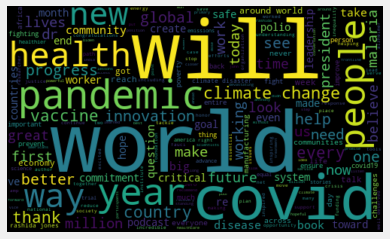

In [ ]:
# Now I want to see how well these sentiments are distributed.
# We can plot a word cloud (visualization of word (bigger and bolder))

# Plot Word Cloud
all_words = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,"covid-19 has cost lives, sickened millions, an...",0.500000,-0.500000,Negative
1,this has been a year unlike any other in our l...,0.340909,0.102273,Positive
2,: i believe that women can be the architects o...,0.500000,0.500000,Positive
3,here are four other ways that america can adva...,0.375000,-0.125000,Negative
4,one of the benefits of being 65 is that i’m el...,0.541667,0.525000,Positive
...,...,...,...,...
95,because of long-standing barriers that are mad...,0.600000,-0.333333,Negative
96,: this commitment is critical. “additional man...,0.800000,0.000000,Neutral
97,teaching special education takes an amazing pe...,0.555357,0.426786,Positive
98,": last month, over 1 billion students were aff...",0.066667,0.000000,Neutral


In [ ]:
# Print all of the positive tweets
j = 1

# Sort by polarity
sortedDF = df.sort_values(by=['Polarity'])

# For the number of rows in sorted data frame
for i in range(0, sortedDF.shape[0]):

    # If the analysis at position i is positive
    if (sortedDF['Analysis'][i] == 'Positive'):

        # Then print that tweet
        print(str(j) + ' ) '+sortedDF['Tweets'][i])
        print()
        j = j + 1

1 ) this has been a year unlike any other in our lifetimes. in our new annual letter, melinda and i talk about how we can turn the hard-won lessons of the pandemic into a healthier, more equal future for all. 

2 ) : i believe that women can be the architects of a better world. 

their stories have instilled in me both a sense of urgenc…

3 ) one of the benefits of being 65 is that i’m eligible for the covid-19 vaccine. i got my first dose this week, and i feel great. thank you to all of the scientists, trial participants, regulators, and frontline healthcare workers who got us to this point. 

4 ) it’s great to see president biden elevate science leadership to a cabinet-level position. congratulations _lander. 

5 ) and while covid-19 will rightfully continue to dominate the agenda, the united states also has the opportunity to lead the world in avoiding a climate disaster. the president is taking a great first step by rejoining the paris climate accord.

6 ) with americans across the

In [ ]:
# Print all of the negative tweets
j = 1

# Sort by polarity
sortedDF = df.sort_values(by=['Polarity'])

# For the number of rows in sorted data frame
for i in range(0, sortedDF.shape[0]):

    # If the analysis at position i is positive
    if (sortedDF['Analysis'][i] == 'Negative'):

        # Then print that tweet
        print(str(j) + ' ) '+sortedDF['Tweets'][i])
        print()
        j = j + 1

1 ) covid-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. but hope is on the horizon:  

2 ) here are four other ways that america can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050:  

3 ) the president’s commitment to reengage with the world gives me hope that the recovery will reach everyone, including communities of color in the u.s. and people in poor countries around the world.

4 ) we need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

5 ) nearly forty million people have alzheimer’s or dementia today. we have no way to stop or even slow the disease at this point, but i’m hopeful the new alzheimer’s disease data initiative () will speed up progress. 

6 ) : even with his busy schedule, dr. fauci took the time to sit down with me (again) and talk about w

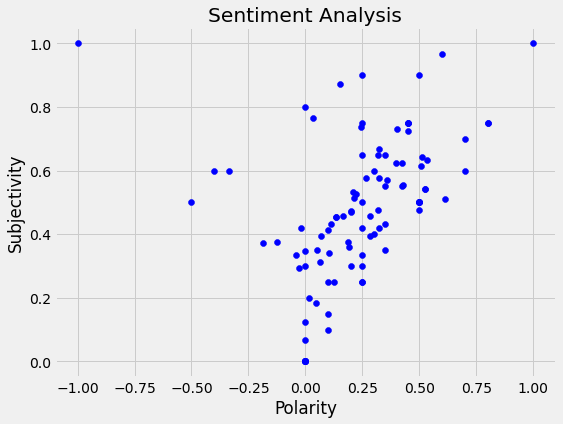

In [ ]:
# Plot the Polarity & Subjectivity of Tweets

plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    # Plot Tweets
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

# Label Plot
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Display Plot
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) * 100, 1)
# Percent of Positive Tweets

78.0

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

9.0

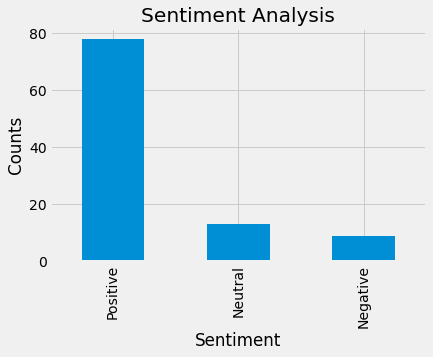

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

# Plot as a BarPlot
df['Analysis'].value_counts().plot(kind='bar')
plt.show()